In [1]:
from fastai.text.all import *
import pandas as pd

In [4]:
text_df = pd.read_csv(r"/content/SP902-Text-Capstone.csv", header=None)
text_df.columns = ['target','title','type']

In [5]:
text_df.head()

,target,title,type
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,3,Iraq Halts Oil Exports from Main Southern Pipeline (Reuters),"Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


In [6]:
text_df.target.value_counts()

3    30000
4    30000
2    30000
1    30000
Name: target, dtype: int64

In [7]:
dls = TextDataLoaders.from_df(text_df,
                              text_col=['title','type'],
                              label_col='target',
                              valid_pct=0.2,
                              bs=120,
                              )

In [8]:
learn = text_classifier_learner(dls,
                                AWD_LSTM,
                                drop_mult=0.5, 
                                metrics=accuracy
                                )

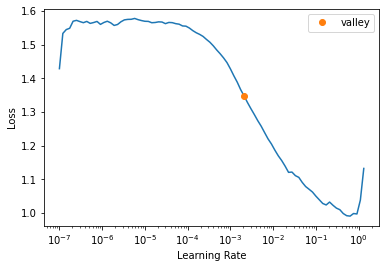

In [9]:
best_learning_rate = learn.lr_find()

In [10]:
learn.fine_tune(4, best_learning_rate[0])

epoch,train_loss,valid_loss,accuracy,time
0,0.557459,0.367795,0.868458,02:36


epoch,train_loss,valid_loss,accuracy,time
0,0.337878,0.263755,0.905167,04:37
1,0.299407,0.238580,0.914417,04:37
2,0.249613,0.222501,0.920042,04:37
3,0.228437,0.222389,0.920667,04:36


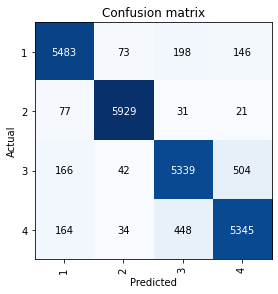

In [11]:
classif_interp = ClassificationInterpretation.from_learner(learn)
classif_interp.plot_confusion_matrix()

In [12]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(5, figsize=(15,10))

,input,target,predicted,probability,loss
0,"xxbos xxfld 1 xxmaj china xxmaj may xxmaj join \ $ xxunk xxmaj xxunk xxfld 2 xxmaj russia said xxmaj thursday that xxmaj china xxmaj petroleum & xxmaj chemical xxmaj corp . , xxmaj asia 's biggest oil refiner , may join xxmaj royal xxmaj dutch / xxmaj shell xxmaj group 's xxmaj xxunk project in the xxmaj pacific and buy liquefied natural gas from the venture 's offshore fields .",4,3,0.9888894557952881,11.184066772460938
1,"xxbos xxfld 1 xxmaj redskins , xxmaj redmond , & xxmaj red xxmaj ink xxfld 2 xxmaj what was xxmaj dan xxmaj snyder thinking ? xxmaj no , i ' m not referring to the whole xxmaj steve xxmaj spurrier fiasco . xxmaj this has nothing to do with his xxmaj washington xxmaj redskins team -- though one can argue that it 's a reasonably brisk jog between",3,2,0.9995230436325073,9.076621055603027
2,"xxbos xxfld 1 xxmaj british company launches ' docu - game ' recreating xxup jfk assassination xxfld 2 xxup glasgow , xxmaj scotland a xxmaj british company says it 's releasing a video game recreating the 1963 assassination of xxmaj president xxmaj kennedy . xxmaj the xxmaj scottish - based firm xxmaj traffic says ' jfk xxmaj reloaded ' is an educational ' docu - game",2,4,0.9363767504692078,8.746441841125488
3,"xxbos xxfld 1 xxmaj suicide xxmaj bombings xxmaj kill 10 in xxmaj green xxmaj zone xxfld 2 xxmaj insurgents hand - carried explosives into the most fortified section of xxmaj baghdad xxmaj thursday and detonated them within seconds of each other , killing 10 people and wounding 20 .",3,1,0.9987810254096985,8.606149673461914
4,xxbos xxfld 1 xxmaj malaysian xxup pm expresses sadness over hostage tragedy in xxmaj russia xxfld 2 xxmaj malaysian xxmaj prime xxmaj minister xxmaj abdullah xxmaj ahmad xxmaj badawi xxmaj saturday expressed sadness over hostage - taking tragedy in xxmaj russia that killed hundreds of innocent people .,4,1,0.9998807907104492,8.366191864013672
